In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint


In [2]:
pickle_in = open("bloodcelldata.pickle","rb")
data = pickle.load(pickle_in)

pickle_in = open("bloodcelllabels.pickle","rb")
labels = pickle.load(pickle_in)

In [3]:
data = np.array(data)
labels = np.array(labels)

In [4]:
data = data/255

In [5]:
model = Sequential()

model.add(Conv2D(16,3,3, padding = 'same', input_shape= (224,224,3) ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 75, 75, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 37, 37, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 32)        1

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:

filepath="medicalmodel-weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
medicalModelHist = model.fit(data, labels, batch_size=64, epochs=100, validation_split=0.3,callbacks=callbacks_list,verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.24424, saving model to medicalmodel-weights-improvement-01-0.24.hdf5

Epoch 00002: val_accuracy improved from 0.24424 to 0.36288, saving model to medicalmodel-weights-improvement-02-0.36.hdf5

Epoch 00003: val_accuracy improved from 0.36288 to 0.41189, saving model to medicalmodel-weights-improvement-03-0.41.hdf5

Epoch 00004: val_accuracy did not improve from 0.41189

Epoch 00005: val_accuracy improved from 0.41189 to 0.45447, saving model to medicalmodel-weights-improvement-05-0.45.hdf5

Epoch 00006: val_accuracy improved from 0.45447 to 0.90064, saving model to medicalmodel-weights-improvement-06-0.90.hdf5

Epoch 00007: val_accuracy did not improve from 0.90064

Epoch 00008: val_accuracy did not improve from 0.90064

Epoch 00009: val_accuracy did not improve from 0.90064

Epoch 00010: val_accuracy improved from 0.90064 to 0.93224, saving model to medicalmodel-weights-improvement-10-0.93.hdf5

Epoch 00011: val_accuracy did not improv

In [11]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[224,224,3], include_top=False,weights='imagenet')

In [12]:
model2 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [13]:
model2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:

filepath="mobilenet-weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 250884    
Total params: 2,508,868
Trainable params: 2,474,756
Non-trainable params: 34,112
_________________________________________________________________


In [16]:
mobilenetHist = model2.fit(data, labels, batch_size=64, epochs=100, validation_split=0.3,callbacks=callbacks_list,verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.25121, saving model to mobilenet-weights-improvement-01-0.25.hdf5


C:\Users\sulut\anaconda3\envs\gputest\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_accuracy improved from 0.25121 to 0.49009, saving model to mobilenet-weights-improvement-02-0.49.hdf5

Epoch 00003: val_accuracy did not improve from 0.49009

Epoch 00004: val_accuracy did not improve from 0.49009

Epoch 00005: val_accuracy did not improve from 0.49009

Epoch 00006: val_accuracy did not improve from 0.49009

Epoch 00007: val_accuracy did not improve from 0.49009

Epoch 00008: val_accuracy did not improve from 0.49009

Epoch 00009: val_accuracy did not improve from 0.49009

Epoch 00010: val_accuracy did not improve from 0.49009

Epoch 00011: val_accuracy did not improve from 0.49009

Epoch 00012: val_accuracy did not improve from 0.49009

Epoch 00013: val_accuracy did not improve from 0.49009

Epoch 00014: val_accuracy did not improve from 0.49009

Epoch 00015: val_accuracy improved from 0.49009 to 0.58945, saving model to mobilenet-weights-improvement-15-0.59.hdf5

Epoch 00016: val_accuracy improved from 0.58945 to 0.63390, saving model to mobilenet-w

In [18]:
print(medicalModelHist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


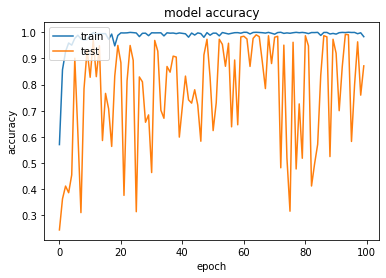

In [22]:
import matplotlib.pyplot as plt

plt.plot(medicalModelHist.history['accuracy'])
plt.plot(medicalModelHist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

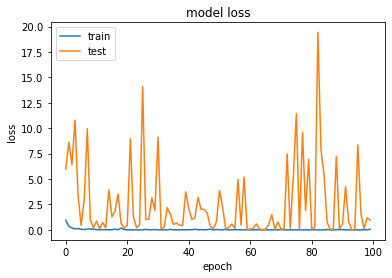

In [23]:
plt.plot(medicalModelHist.history['loss'])
plt.plot(medicalModelHist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

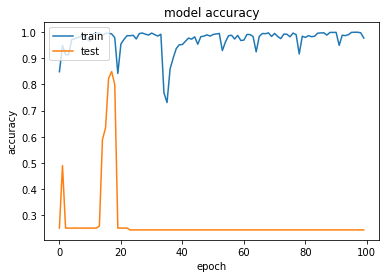

In [24]:
plt.plot(mobilenetHist.history['accuracy'])
plt.plot(mobilenetHist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

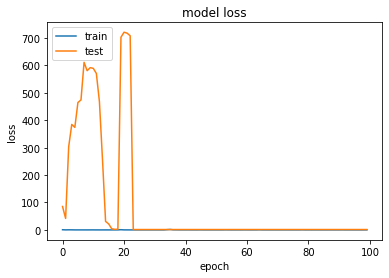

In [25]:
plt.plot(mobilenetHist.history['loss'])
plt.plot(mobilenetHist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')
